In [1]:
#Ayush Pandhi [1003227457] [University of Toronto]
#Chloe Cheng [1003254818] [University of Toronto]

#Importing required modules
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
from scipy.constants import epsilon_0
from scipy.special import kn
import pylab

In [2]:
#PROBLEM 1

#PART B
#Import lightspeed data
cdata = np.genfromtxt('cdata.txt', unpack=True)

#Defining a function for equation 5 from the lab manual
def eq5(x):
    n = len(x)                                         #Number of data points
    xbar = (1/n)*(np.sum(x))                           #Sample mean of the input data
    sigma = ((1/(n-1))*(np.sum((x - xbar)**2)))**(1/2) #Standard deviation [Equation 5]
    return(sigma)

#Defining a function for equation 6 from the lab manual
def eq6(x):
    n = len(x)                                                                 #Number of data points
    if (np.sum(x**2) - n*(((1/n)*(np.sum(x)))**2)) >= 0:
        sigma = ((1/(n-1))*(np.sum(x**2) - n*(((1/n)*(np.sum(x)))**2)))**(1/2) #Standard deviation [Equation 6]
    else:
        print('Negative value encountered under the square root')
    return(sigma)

#Applying equation 5, 6 and numpy.std on lightspeed data
sigma1 = eq5(cdata)
sigma2 = eq6(cdata)
sigma3 = np.std(cdata, ddof=1)

#Computing relative errors for lightspeed data
rel_err1 = (sigma1 - sigma3)/sigma3
rel_err2 = (sigma2 - sigma3)/sigma3

#Printing error results for lightspeed data
print('Equation 5 Result:', sigma1)
print('Equation 6 Result:', sigma2)
print('Numpy Result:', sigma3)
print('Relative Error of Equation 5:', rel_err1)
print('Relative Error of Equation 6:', rel_err2)
print()

#PART C
#Generate sequences from normal distributions
seq1 = np.random.normal(0., 1., 2000)
seq2 = np.random.normal(1.e7, 1., 2000)

#Applying equation 5, 6 and numpy.std for the generated sequences
sigma_seq1_1 = eq5(seq1)
sigma_seq1_2 = eq6(seq1)
sigma_seq2_1 = eq5(seq2)
sigma_seq2_2 = eq6(seq2)
sigma_seq1_np = np.std(seq1, ddof=1)
sigma_seq2_np = np.std(seq2, ddof=1)

#Computing relative errors for the generated sequences
rel_err_seq1_1 = (sigma_seq1_1 - sigma_seq1_np)/sigma_seq1_np
rel_err_seq1_2 = (sigma_seq1_2 - sigma_seq1_np)/sigma_seq1_np
rel_err_seq2_1 = (sigma_seq2_1 - sigma_seq2_np)/sigma_seq2_np
rel_err_seq2_2 = (sigma_seq2_2 - sigma_seq2_np)/sigma_seq2_np

#Printing error results for the generated sequences
print('Sequence 1, Equation 5 Result:', sigma_seq1_1)
print('Sequence 1, Equation 6 Result:', sigma_seq1_2)
print('Sequence 1, Numpy Result:', sigma_seq1_np)
print('Sequence 1, Relative Error of Equation 5:', rel_err_seq1_1)
print('Sequence 1, Relative Error of Equation 6:', rel_err_seq1_2)
print()
print('Sequence 2, Equation 5 Result:', sigma_seq2_1)
print('Sequence 2, Equation 6 Result:', sigma_seq2_2)
print('Sequence 2, Numpy Result:', sigma_seq2_np)
print('Sequence 2, Relative Error of Equation 5:', rel_err_seq2_1)
print('Sequence 2, Relative Error of Equation 6:', rel_err_seq2_2)
print()

#PART D
#Repeat the analysis for sequence 2 but centered at 0 instead
seq2fix = seq2 - np.mean(seq2)
sigma_seq2fix_2 = eq6(seq2fix)
sigma_seq2fix_np = np.std(seq2fix, ddof=1)
rel_err_seq2fix_2 = (sigma_seq2fix_2 - sigma_seq2fix_np)/sigma_seq2fix_np
print('Sequence 2 (centered at 0), Relative Error of Equation 6:', rel_err_seq2fix_2)

Equation 5 Result: 0.07901054781905067
Equation 6 Result: 0.07901054763832621
Numpy Result: 0.07901054781905067
Relative Error of Equation 5: 0.0
Relative Error of Equation 6: -2.2873460336752e-09

Sequence 1, Equation 5 Result: 0.9759594074302417
Sequence 1, Equation 6 Result: 0.9759594074302417
Sequence 1, Numpy Result: 0.9759594074302418
Sequence 1, Relative Error of Equation 5: -1.1375709032288943e-16
Sequence 1, Relative Error of Equation 6: -1.1375709032288943e-16

Sequence 2, Equation 5 Result: 0.9912305590194151
Sequence 2, Equation 6 Result: 0.9800409379817049
Sequence 2, Numpy Result: 0.9912305590194153
Sequence 2, Relative Error of Equation 5: -1.120045194857043e-16
Sequence 2, Relative Error of Equation 6: -0.01128861588849704

Sequence 2 (centered at 0), Relative Error of Equation 6: -1.120045194857043e-16


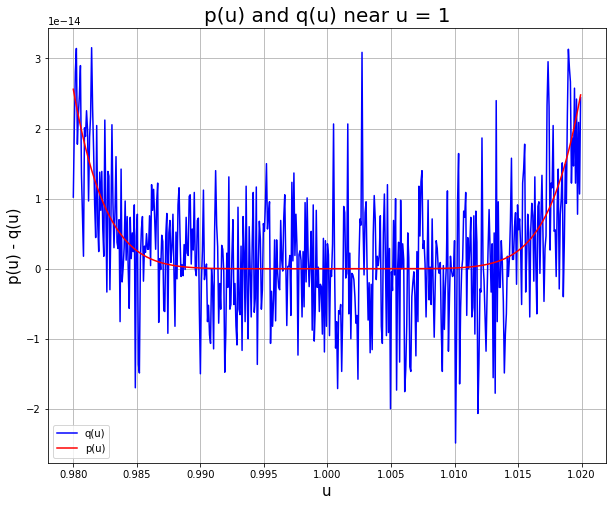

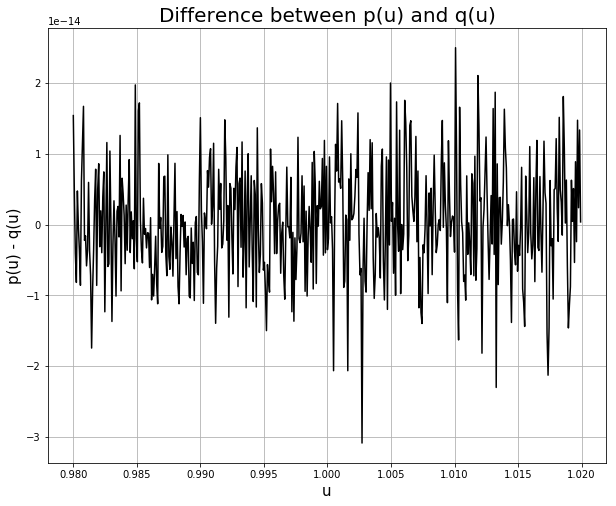

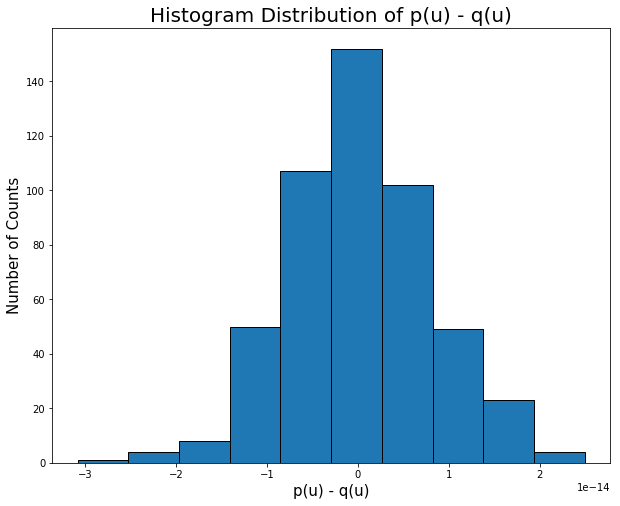

The standard deviation calculated using np.std is  7.885361862808939e-15
The error calculated using equation 7 is  1.8864961807541514e-14


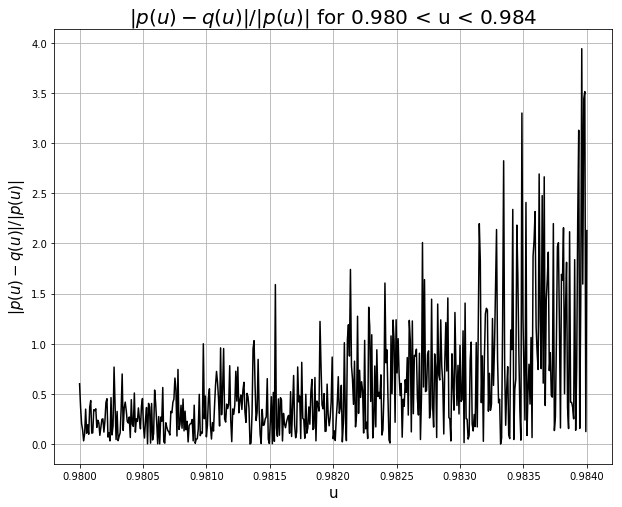

Estimated value of u for which the error approaches 100%: 0.9807488361098733


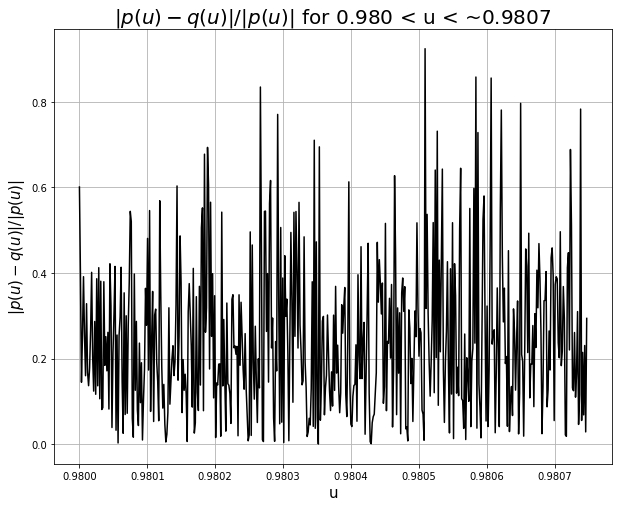

Standard deviation of f:  1.472877282518059e-16
Result from Equation 4.5 from the text: 1.414213562373095e-16


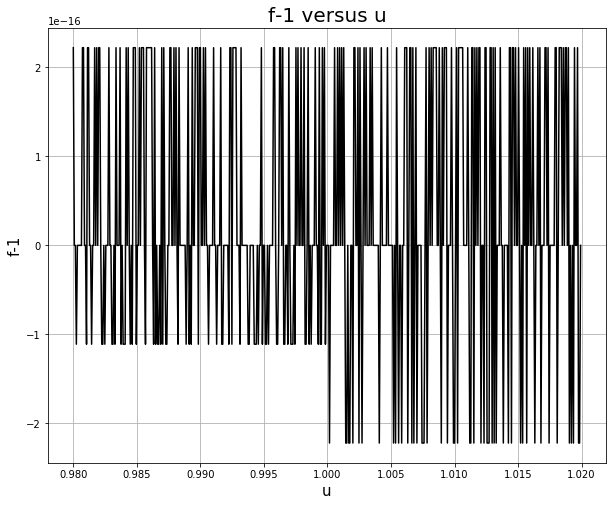

In [3]:
#PROBLEM 2

#PART A
#Define functions for p(u) from the lab manual
def p(u):
    out = (1 - u)**8
    return out

#Write a function for q(u) from the lab manual
def q(u):
    out = 1 - 8*u + 28*u**2 - 56*u**3 + 70*u**4 - 56*u**5 + 28*u**6 - 8*u**7 + u**8
    return out

#Create an array for points u close to 1
u = np.arange(0.98, 1.02, (1.02-0.98)/500)

#Plot p(u) and q(u) close to u = 1
plt.figure(figsize=(10,8))
plt.plot(u, q(u), 'b-', label='q(u)')
plt.plot(u, p(u), 'r-', label='p(u)')
plt.title('p(u) and q(u) near u = 1', fontsize=20)
plt.xlabel('u', fontsize=15)
plt.ylabel('p(u) - q(u)', fontsize=15)
plt.grid()
plt.legend()
plt.savefig('lab2_q2_plot1.pdf', bbox_inches='tight')
plt.show()

#PART B
#Plotting p(u) - q(u) as a function of u
pylab.figure(figsize=(10,8))
plt.title('Difference between p(u) and q(u)', fontsize=20)
plt.xlabel('u', fontsize=15)
plt.ylabel('p(u) - q(u)', fontsize=15)
pylab.plot(u, p(u)-q(u), 'k-')
plt.grid()
plt.savefig('lab2_q2_plot2.pdf', bbox_inches='tight')
pylab.show()

#Plotting a histogram distribution of p(u) - q(u)
pylab.figure(figsize=(10,8))
plt.title('Histogram Distribution of p(u) - q(u)', fontsize=20)
plt.xlabel('p(u) - q(u)', fontsize=15)
plt.ylabel('Number of Counts', fontsize=15)
pylab.hist(p(u)-q(u), edgecolor='k')
plt.savefig('lab2_q2_plot3.pdf', bbox_inches='tight')
pylab.show()

#Define a function for equation 7 from the lab manual
def err_sum(C, N):
    sigma = C*np.sqrt(N)*np.sqrt(28.44**2)
    return sigma

#Computing standard deviation with numpy for the distribution
dist_std = np.std(p(u)-q(u))

#Defining constant C and applying equation 7
C = 1e-16
pq_err_sum = err_sum(C, 44) #Here we define N = 44 as the number of operations

#Printing the results computed above
print('The standard deviation calculated using np.std is ', dist_std)
print('The error calculated using equation 7 is ', pq_err_sum)

#PART C
#Define values of u between 0.980 and 0.984
u2 = np.arange(0.980, 0.984, (0.984-0.980)/500)

#Define the absolute function to be plotted
abs_func = abs(p(u2)-q(u2))/abs(p(u2))

#Plotting the absolute function
plt.figure(figsize=(10,8))
plt.plot(u2, abs_func, 'k-')
plt.title('$|p(u) - q(u)|/|p(u)|$ for 0.980 < u < 0.984', fontsize=20)
plt.xlabel('u', fontsize=15)
plt.ylabel('$|p(u) - q(u)|/|p(u)|$', fontsize=15)
plt.grid()
plt.savefig('lab2_q2_plot4.pdf', bbox_inches='tight')
plt.show()

#Write equation for equation 8
def frac_err(C, N):
    sigma = (C/np.sqrt(N))*(np.sqrt(28.44**2)/10)
    err = sigma/10
    return err

#Computing fractional error for given C and N
pq_frac_err = frac_err(C, 44)

#Computing the value of u where the error approaches 100%
new_u = 1 - (pq_err_sum)**(1/8)

#Printing the computed u
print('Estimated value of u for which the error approaches 100%:', new_u)

#Defining a new array of values for u between 0.980 and the estimated u above
new_u_array = np.arange(0.980, new_u, (new_u - 0.980)/500)

#Verifying again by computing the absolute difference
new_abs_func = abs(p(new_u_array)-q(new_u_array))/abs(p(new_u_array))

#Plotting the absolute difference given the new range of u values
plt.figure(figsize=(10,8))
plt.plot(new_u_array, new_abs_func, 'k-')
plt.title('$|p(u) - q(u)|/|p(u)|$ for 0.980 < u < ~0.9807', fontsize=20)
plt.xlabel('u', fontsize=15)
plt.ylabel('$|p(u) - q(u)|/|p(u)|$', fontsize=15)
plt.grid()
plt.savefig('lab2_q2_plot5.pdf', bbox_inches='tight')
plt.show()

#PART D
#Defining f as given in the lab manual
f = u**8/((u**4)*(u**4))

#Computing the standard deviation of f with numpy
f_std = np.std(f)

#Printing results for standard deviation and equation 4.5 from the textbook
print('Standard deviation of f: ', f_std)
print('Result from Equation 4.5 from the text:', np.mean(np.sqrt(2)*C*f)) 

#Plotting f-1 as a function of u
plt.figure(figsize=(10,8))
plt.plot(u, f-1, 'k-')
plt.title('f-1 versus u', fontsize=20)
plt.xlabel('u', fontsize=15)
plt.ylabel('f-1', fontsize=15)
plt.grid()
plt.savefig('lab2_q2_plot6.pdf', bbox_inches='tight')
plt.show()

In [4]:
#PROBLEM 3

#PART B
#Defining a function for B; here we used the form of the equation with v = frequency instead of wavenumber to work in SI units
def B(v):
    T = 5000                                             #Arbitrarily set to 5000 [K], can change this value
    h = 6.62607004e-34                                   #Planck's constant [m^2 kg s^-1]
    c = 3e8                                              #Speed of light [m s^-2]
    k = 1.38064852e-23                                   #Boltzmann constant [m^2 kg s^-2 K^-1]
    B = (2*h*(c**(-2))*(v**3))/(np.exp((h*v)/(k*T)) - 1) #Planck's Law using frequency
    return B

#Defining conditions for integration
N = 1000000 #Number of steps
a = 0.1     #Lower intergration bound; we don't integrate from exactly 0 since that will give us inf in the integration
b = 2**63-1 #Upper integration bound; since we can't integrate to infinity, we instead integrate to a very large number
h = (b-a)/N #Width of each slice that we integrate

#Trapezoidal Integration
s = 0.5*B(a) + 0.5*B(b) #First term in the integration
for k in range(1,N):    #Use a loop to sum over N steps for the second term
    s += B(a+k*h)       #Add each i-th component
W = h*s*np.pi           #Multiply the integral by a factor of pi to get W
print('Computed W from Trapezoidal Integration:', W)

#Simpson's Rule Integration
s2 = B(a) + B(b)       #First term in the integration
for k in range(1,N,2): #Loop to sum over all odd steps
    s2 += 4*B(a+k*h)
for k in range(2,N,2): #Loop to sum over all even steps
    s2 += 2*B(a+k*h)
W2 = (h/3)*s2*np.pi
print('Computed W from Simpson Integration:', W2)
print()

#PART C
#Comparing our estimated Stefan-Boltzmann constant to the known value
print('Our Estimated Stefan-Boltzmann Constant with Trapezoidal Integration:', W/(5000**4), '[J m^-2 s^-1]')
print('Our Estimated Stefan-Boltzmann Constant with Simpson Integration:', W2/(5000**4), '[J m^-2 s^-1]')
print('Compare to the constant from scipy.constants:', const.Stefan_Boltzmann, '[J m^-2 s^-1]')

Computed W from Trapezoidal Integration: 35390773.197413705
Computed W from Simpson Integration: 35390780.17188111

Our Estimated Stefan-Boltzmann Constant with Trapezoidal Integration: 5.662523711586193e-08 [J m^-2 s^-1]
Our Estimated Stefan-Boltzmann Constant with Simpson Integration: 5.662524827500977e-08 [J m^-2 s^-1]
Compare to the constant from scipy.constants: 5.670367e-08 [J m^-2 s^-1]


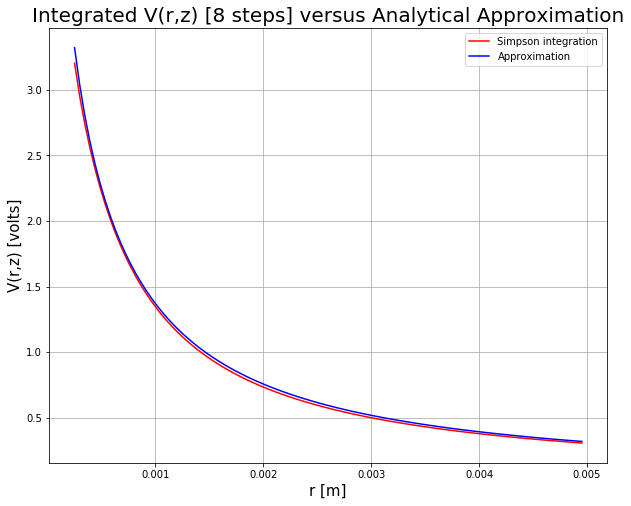

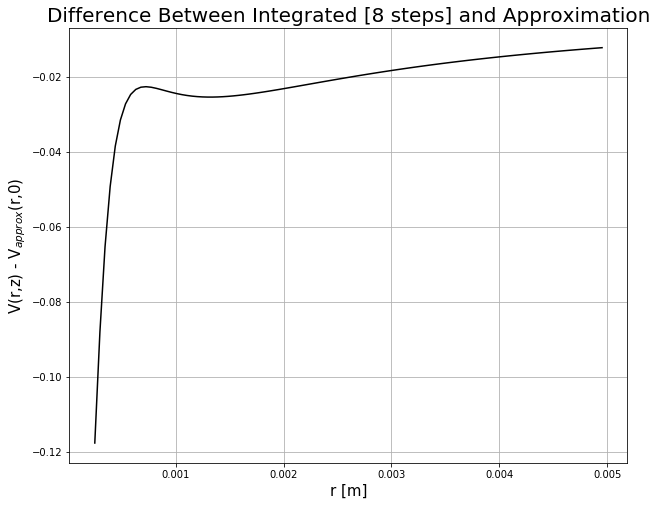

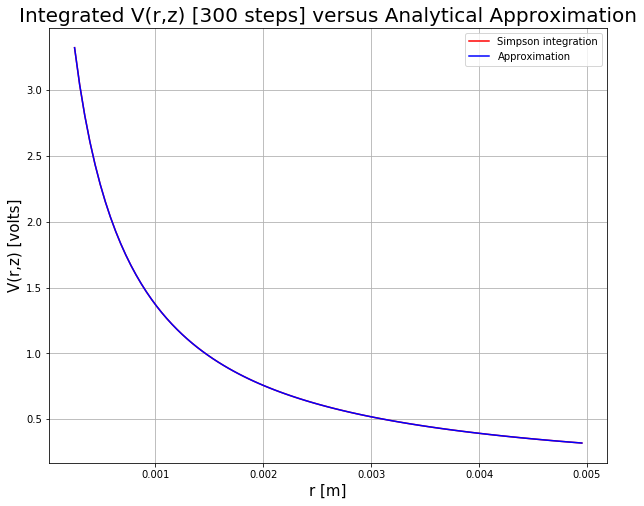

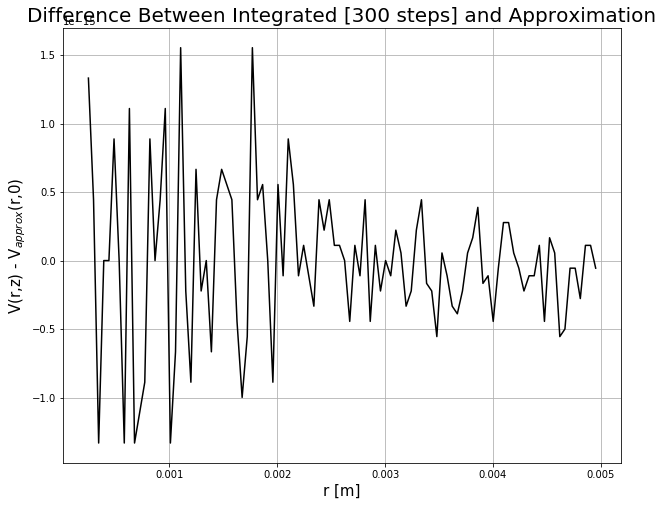

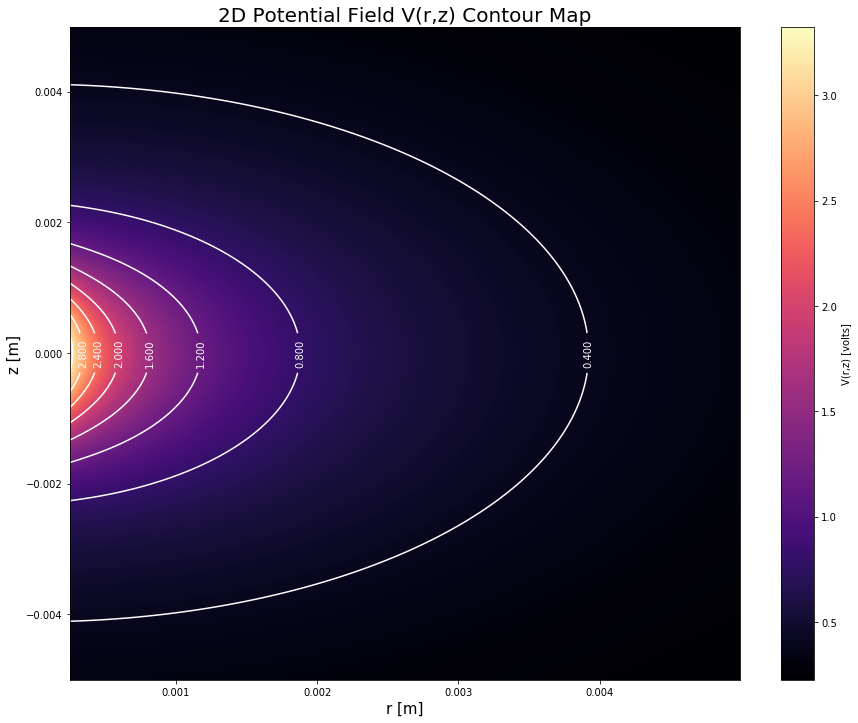

In [5]:
#PROBLEM 4

#PART A
#Defining V as given in equation 3 of the lab manual
def V(Q, x, z, l, r):
    potential = (Q*np.exp(-np.tan(x)**2))/(4*np.pi*epsilon_0*np.cos(x)**2*np.sqrt((z - l*np.tan(x))**2 + r**2))
    return potential

#Defining a function for V(z=0) as given in equation 4 of the lab manual
def V_approx(Q, l, r, x):
    potential = (Q/(4*np.pi*epsilon_0*l))*np.exp(r**2/(2*l**2))*kn(0, r**2/(2*l**2))
    return potential

#Defining a range of u between -pi/2 and pi/2
u3 = np.arange(-np.pi/2, np.pi/2, (np.pi/2 - (-np.pi/2))/100)

#Defining a range of 4 between 0.25 mm < r < 5 mm
r = np.arange(2.5e-4, 5e-3, (5e-3 - 2.5e-4)/100)

#Defining other constants for the integration
Q = 1e-13      #Set to 1e-13 [C] as defined in questions 4a
l = 1e-3       #Set to 1 [m] as defined in question 4a
z = 0          #Setting z to 0 [m]
N = 8          #Number of integration steps
N2 = 300       #Number of integration steps used for reducing error
a = -np.pi/2   #Lower integration bound
b = np.pi/2    #Upper integration bound
h = (b-a)/N    #Width of integrated slice
h2 = (b-a)/N2  #Width of integrated slice corresponding to N2

#Applying Simpson's Rule Integration for N=8 steps
s2 = V(Q, a, z, l, r) + V(Q, b, z, l, r) #First term in intergration
for k in range(1, N, 2):                 #Loop to sum over all odd steps
    s2 += 4*V(Q, a+k*h, z, l, r)
for k in range(2, N, 2):                 #Loop to sum over all even steps
    s2 += 2*V(Q, a+k*h, z, l, r)
simpson_8steps = (h/3)*s2                #Integrated output for N=8 steps

#Applying Simpson's Rule Integration for N=300 steps
s_new = V(Q, a, z, l, r) + V(Q, b, z, l, r) #First term in integration
for k in range(1, N2, 2):                   #Loop to sum over all odd steps
    s_new += 4*V(Q, a+k*h2, z, l, r)
for k in range(2, N2, 2):                   #Loop to sum over all odd steps
    s_new += 2*V(Q, a+k*h2, z, l, r)
simpson_300steps = (h2/3)*s_new             #Integrated output for N=300 steps

#Computing the expexted value from equation 4 from the lab manual
V_comp = V_approx(Q, l, r, u3)

#Plotting the 8 step integrated result against the expected result using equation 4
plt.figure(figsize=(10,8))
plt.title('Integrated V(r,z) [8 steps] versus Analytical Approximation', fontsize=20)
plt.xlabel('r [m]', fontsize=15)
plt.ylabel('V(r,z) [volts]', fontsize=15)
plt.plot(r, simpson_8steps, 'r', label='Simpson integration')
plt.plot(r, V_comp, 'b', label='Approximation')
plt.grid()
plt.legend()
plt.savefig('lab2_q4_plot1.pdf', bbox_inches='tight')
plt.show()

#Plotting the difference between our result and the approximation
plt.figure(figsize=(10,8))
plt.title('Difference Between Integrated [8 steps] and Approximation', fontsize=20)
plt.xlabel('r [m]', fontsize=15)
plt.ylabel('V(r,z) - V$_{approx}$(r,0)', fontsize=15)
plt.plot(r, simpson_8steps-V_comp, 'k')
plt.grid()
plt.savefig('lab2_q4_plot2.pdf', bbox_inches='tight')
plt.show()

#Plotting the 300 step integrated result against the expected result using equation 4
plt.figure(figsize=(10,8))
plt.title('Integrated V(r,z) [300 steps] versus Analytical Approximation', fontsize=20)
plt.xlabel('r [m]', fontsize=15)
plt.ylabel('V(r,z) [volts]', fontsize=15)
plt.plot(r, simpson_300steps, 'r', label='Simpson integration')
plt.plot(r, V_comp, 'b', label='Approximation')
plt.grid()
plt.legend()
plt.savefig('lab2_q4_plot3.pdf', bbox_inches='tight')
plt.show()

#Plotting the difference between the 300 step result and the approximation
plt.figure(figsize=(10,8))
plt.title('Difference Between Integrated [300 steps] and Approximation', fontsize=20)
plt.xlabel('r [m]', fontsize=15)
plt.ylabel('V(r,z) - V$_{approx}$(r,0)', fontsize=15)
plt.plot(r, simpson_300steps-V_comp, 'k')
plt.grid()
plt.savefig('lab2_q4_plot4.pdf', bbox_inches='tight')
plt.show()

#PART B
#Setting up a range of z and r values such that −5 mm < z < 5 mm and 0.25 mm < r < 5 mm
z2 = np.arange(-5e-3, 5e-3, (5e-3+5e-3)/500)     #z [m]
r2 =np.arange(2.5e-4, 5e-3, (5e-3 - 2.5e-4)/500) #r [m]

#Creating a meshgrid using z and r
R,Z = np.meshgrid(r2, z2)
    
#Applying Simpson's Rule Integration
s_z = V(Q, a, Z, l, R) + V(Q, b, Z, l, R) #First term in intergration
for k in range(1, N2, 2):
    s_z += 4*V(Q, a+k*h2, Z, l, R)        #Loop to sum over all odd steps
for k in range(2, N2, 2):
    s_z += 2*V(Q, a+k*h2, Z, l, R)        #Loop to sum over all even steps
simpson_z = (h2/3)*s_z                    #Integrated output for N=300 steps

#Plotting the 2D potential field as a colour map in r-z space
plt.figure(figsize=(15,12))
plt.title('2D Potential Field V(r,z) Contour Map', fontsize=20)
plt.xlabel('r [m]', fontsize=15)
plt.ylabel('z [m]', fontsize=15)
plt.scatter(R, Z, c=simpson_z, cmap='magma', marker='.')
plt.colorbar(label='V(r,z) [volts]')
plt.xlim(np.min(R), np.max(R))
plt.ylim(np.min(Z), np.max(Z))
contour = plt.contour(R, Z, simpson_z, colors='white')
manual_locations = [(0.00035,0), (0.00045,0), (0.00060,0), (0.00080,0), (0.00118,0), (0.001885,0), (0.00392,0)]
plt.clabel(contour, inline=1, fontsize=10, manual=manual_locations, rightside_up=False)
plt.savefig('lab2_q4_plot5.pdf', bbox_inches='tight')
plt.show()